In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Petrol_consumption.csv')

In [3]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
x = df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [7]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [8]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36, 4), (12, 4), (36,), (12,))

### Build the model

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree = DecisionTreeRegressor(random_state=0)

In [28]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

### Mean Absolute Error 

In [55]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [56]:
err_test = mean_absolute_error(y_test,y_pred)
err_test

68.08333333333333

### Mean Absolute Percentage Error 

In [57]:
mean_absolute_percentage_error(y_test,y_pred)

0.1294003614849453

In [58]:
result = pd.DataFrame({
    'Actual' : y_test,
    'Predicted': y_pred
})

In [59]:
result

,Actual,Predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


<BarContainer object of 4 artists>

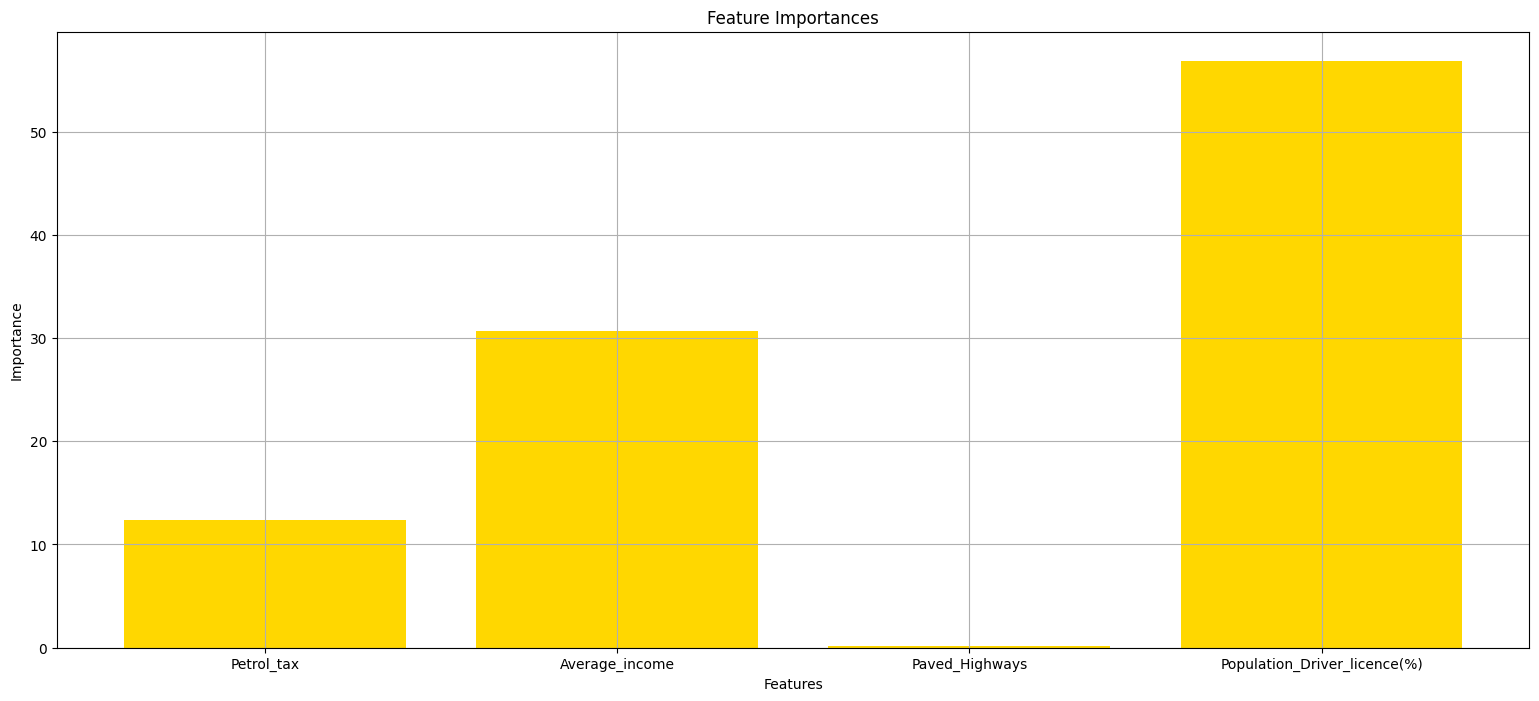

In [70]:
plt.figure(figsize=(19,8))
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns,tree.feature_importances_*100,color = 'gold')


In [71]:
tree.feature_importances_

array([0.12361507, 0.30645154, 0.00145639, 0.568477  ])

In [72]:
from sklearn.tree import plot_tree

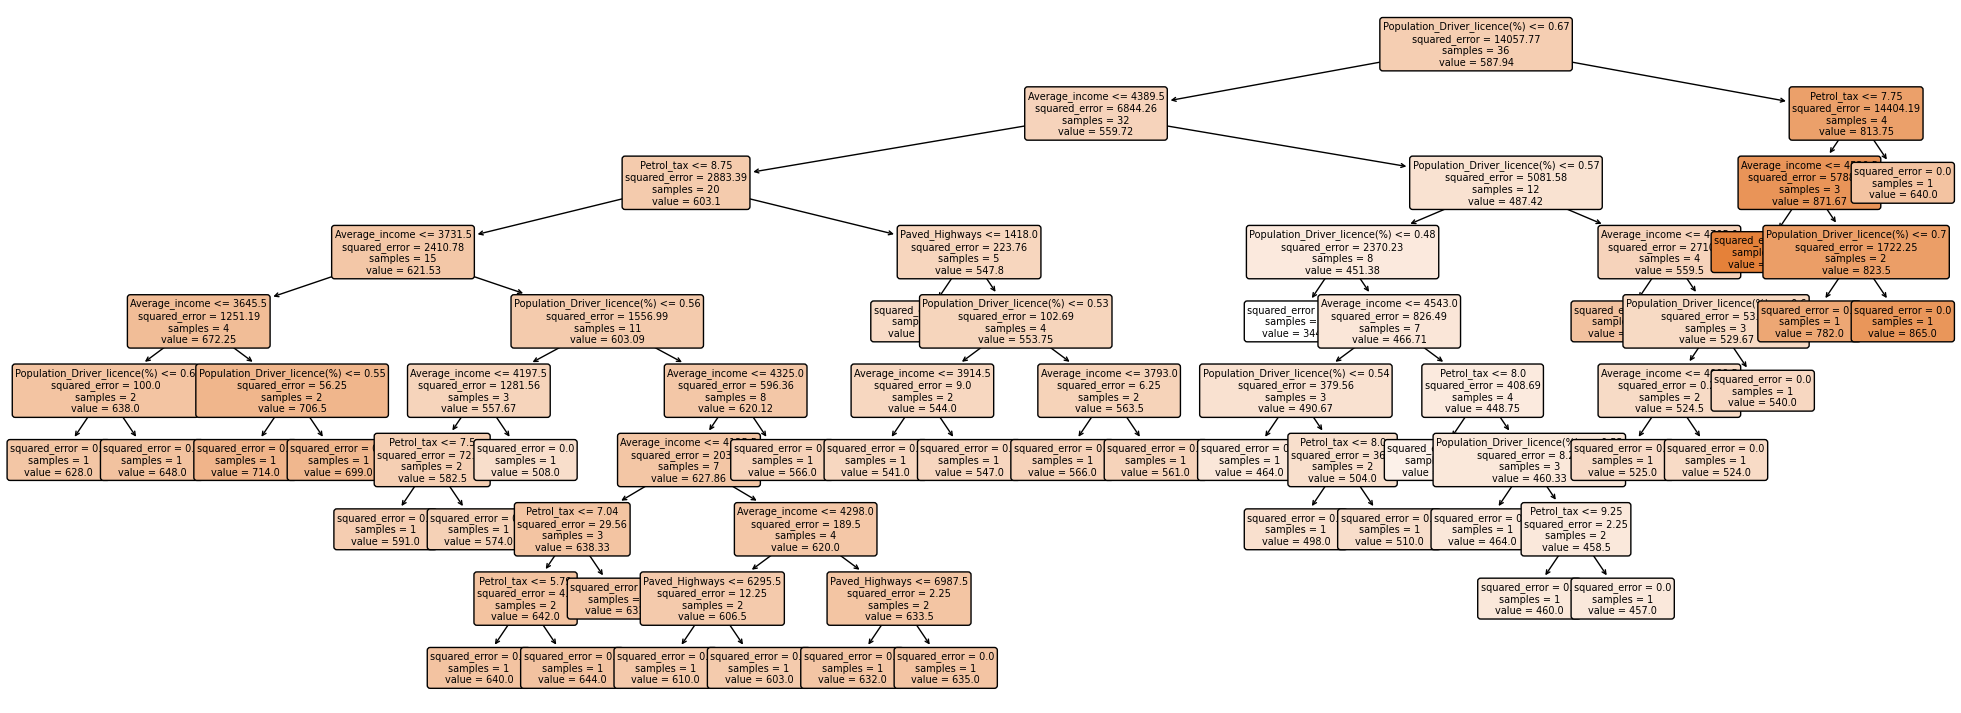

In [87]:
plt.figure(figsize = (25,9))
plot_tree(tree,fontsize = 7,filled = True,
         feature_names = x.columns,rounded = True,precision = 2);
plt.savefig('tree.png')

In [92]:
new = pd.DataFrame(data=[[7.00, 4207, 6580, 0.545], 
                        [6.00,5212, 2306, 0.672]], columns=x.columns)
   

In [93]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7.0,4207,6580,0.545
1,6.0,5212,2306,0.672


In [95]:
tree.predict(new)

array([508., 782.])